In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2026-02-14 16:10:42.548016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-14 16:10:44.715137: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-14 16:10:46.396930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771081848.913228   20638 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771081849.248653   20638 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771081852.254372   20638 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
# 1. CRÉATION DE DONNÉES SYNTHÉTIQUES (Une onde sinus = une météo cyclique)
data = np.sin(np.linspace(0, 100, 1000)) 

In [3]:
data

array([ 0.00000000e+00,  9.99330162e-02,  1.98865536e-01,  2.95807081e-01,
        3.89787104e-01,  4.79864709e-01,  5.65138069e-01,  6.44753455e-01,
        7.17913784e-01,  7.83886601e-01,  8.42011406e-01,  8.91706275e-01,
        9.32473678e-01,  9.63905466e-01,  9.85686954e-01,  9.97600074e-01,
        9.99525555e-01,  9.91444120e-01,  9.73436677e-01,  9.45683512e-01,
        9.08462478e-01,  8.62146222e-01,  8.07198446e-01,  7.44169268e-01,
        6.73689717e-01,  5.96465408e-01,  5.13269488e-01,  4.24934884e-01,
        3.32345974e-01,  2.36429728e-01,  1.38146426e-01,  3.84800478e-02,
       -6.15715795e-02, -1.61006773e-01, -2.58830020e-01, -3.54061947e-01,
       -4.45749125e-01, -5.32973611e-01, -6.14862143e-01, -6.90594881e-01,
       -7.59413613e-01, -8.20629350e-01, -8.73629220e-01, -9.17882606e-01,
       -9.52946458e-01, -9.78469728e-01, -9.94196886e-01, -9.99970476e-01,
       -9.95732696e-01, -9.81525973e-01, -9.57492539e-01, -9.23873010e-01,
       -8.81003973e-01, -

In [4]:
# Préparation : on utilise les 50 derniers points pour prédire le suivant
X, y = [], []
for i in range(50, len(data)):
    X.append(data[i-50:i])
    y.append(data[i])
X, y = np.array(X), np.array(y)

In [6]:
y

array([-9.57492539e-01, -9.23873010e-01, -8.81003973e-01, -8.29314618e-01,
       -7.69322443e-01, -7.01628067e-01, -6.26909226e-01, -5.45913979e-01,
       -4.59453224e-01, -3.68392576e-01, -2.73643705e-01, -1.76155204e-01,
       -7.69030966e-02,  2.31189392e-02,  1.22909516e-01,  2.21469563e-01,
        3.17812332e-01,  4.10973269e-01,  5.00019679e-01,  5.84060060e-01,
        6.62253026e-01,  7.33815735e-01,  7.98031727e-01,  8.54258091e-01,
        9.01931909e-01,  9.40575886e-01,  9.69803131e-01,  9.89321030e-01,
        9.98934178e-01,  9.98546331e-01,  9.88161371e-01,  9.67883269e-01,
        9.37915044e-01,  8.98556726e-01,  8.50202358e-01,  7.93336048e-01,
        7.28527123e-01,  6.56424427e-01,  5.77749829e-01,  4.93290992e-01,
        4.03893491e-01,  3.10452344e-01,  2.13903051e-01,  1.15212232e-01,
        1.53679464e-02, -8.46301977e-02, -1.83781052e-01, -2.81091953e-01,
       -3.75588654e-01, -4.66325087e-01, -5.52392830e-01, -6.32930199e-01,
       -7.07130883e-01, -

In [7]:
# On redimensionne pour le RNN : [échantillons, pas de temps, caractéristiques]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [9]:
X.shape

(950, 50, 1)

In [10]:
# 2. CONSTRUCTION DU MODÈLE LSTM
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(50, 1)),
    tf.keras.layers.Dense(1) # On prédit une seule valeur continue
])

2026-02-14 16:20:15.494897: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/yves/anaconda3/envs/tensflow/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 3. COMPILATION ET ENTRAÎNEMENT
model.compile(optimizer='adam', loss='mse') # MSE = Erreur Quadratique Moyenne
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2463
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0353
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0058
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.7517e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.0517e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.8640e-05
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.8483e-05
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.9348e-05
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.9213e-05
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5983e-05
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3379e-05
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2015e-05
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5721e-05
Epoch 15/20
30/30 ━━━━━━━━━━━━━

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


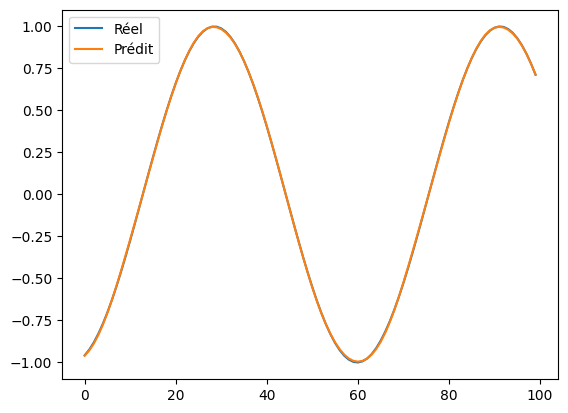

In [15]:
# 4. VISUALISATION
predictions = model.predict(X)
plt.plot(y[:100], label="Réel")
plt.plot(predictions[:100], label="Prédit")
plt.legend()
plt.show()